In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('/content/Customer-Churn.csv')

In [3]:
#inspecting the first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking the attributes of the dataset such as datatypes, null values count, column names, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#converting total charges from object to numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
#checking to confirm data type was changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#finding mean of total charges column and using that value to fill in null rows, since only a small portion of the column has missing values
mean_total_charges = df.TotalCharges.mean()

df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)

In [8]:
#checking to confirm that there are no missing values in the total charges column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#checking the descriptive statistics of the numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
#dropping the customerID column from the dataset as it does not provide any useful information about the dataset
df.drop(columns=['customerID'], inplace=True)

In [11]:
#inspecting the first 5 rows of the dataset to ensure that the customerID column was dropped
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#sorting tenure values into bins and adding that to a new column called Tenure_binned to make visualizations clearer
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12 months', '12-24 months', '24-36 months', '36-48 months', '48-60 months', '60-72 months']

df['Tenure_binned'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

In [13]:
#inspecting the dataset to ensure that the Tenure_binned column were sorted and binned correctly
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_binned
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 months
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36 months
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48 months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months


In [14]:
#determining the churn count
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


In [15]:
#determining the churn rate
100*df.Churn.value_counts()/len(df.Churn)

,count
Churn,
No,73.463013
Yes,26.536987


/tmp/ipython-input-64389113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


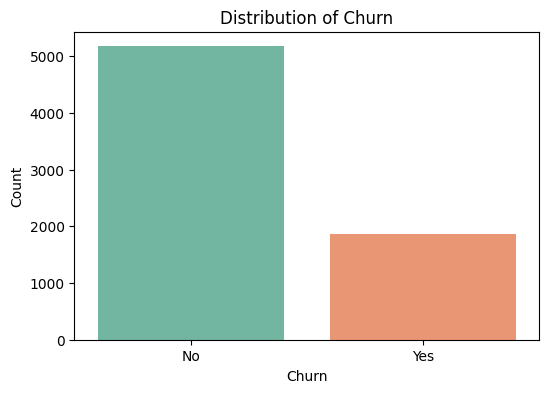

In [16]:
#plotting the churn count of the dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

This dataset is considered to be imbalanced since the proportion of the target variable (Churn) has a split of 73:27, a split of 70:30 or more would be considered more balanced.

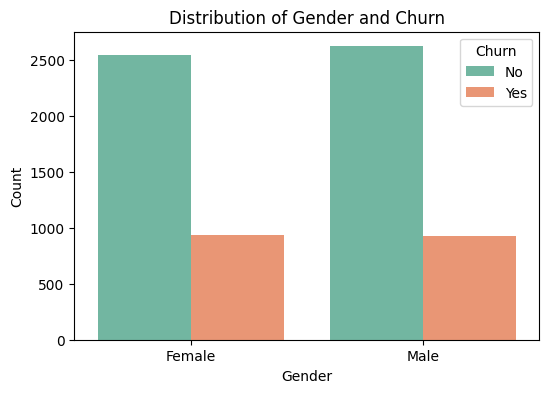

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Distribution of Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [18]:
df.gender.value_counts()

,count
gender,
Male,3555
Female,3488


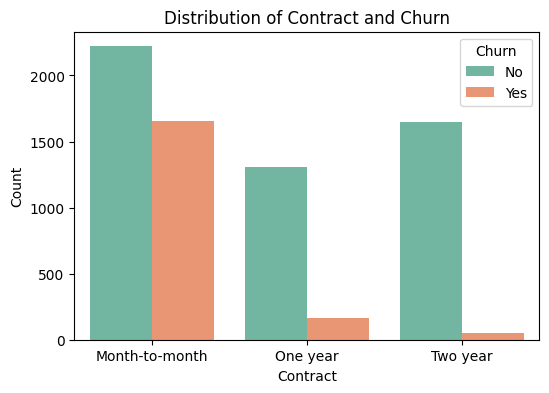

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Distribution of Contract and Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [20]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


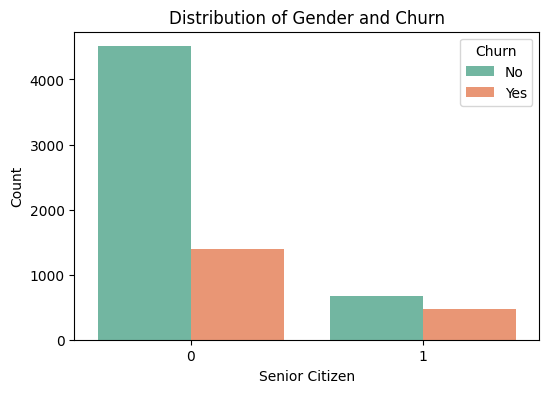

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set2')
plt.title('Distribution of Gender and Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

In [22]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
0,5901
1,1142


##Univariate Analysis
#####Showing the distribution of each predictor in relation to Churn

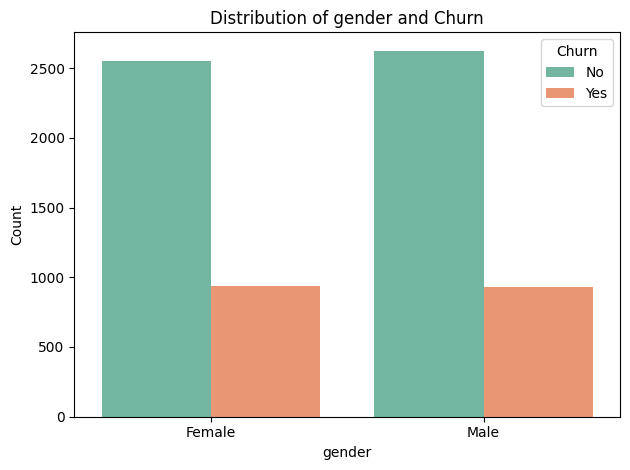

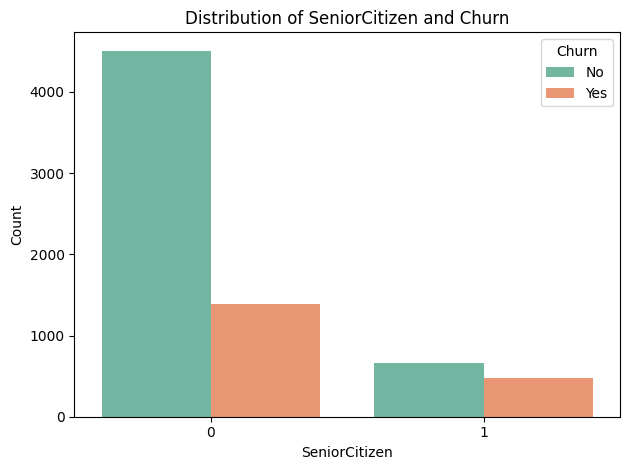

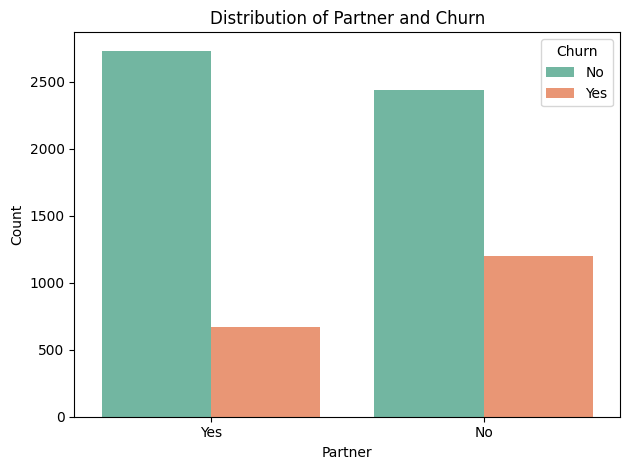

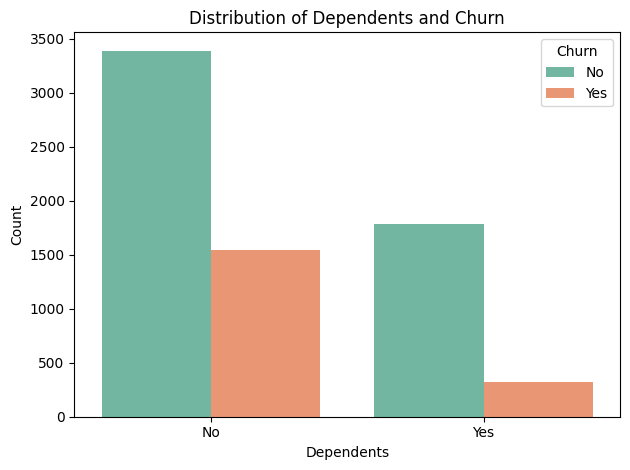

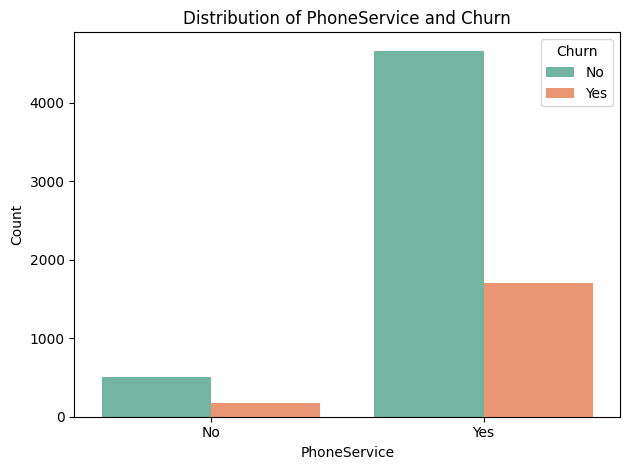

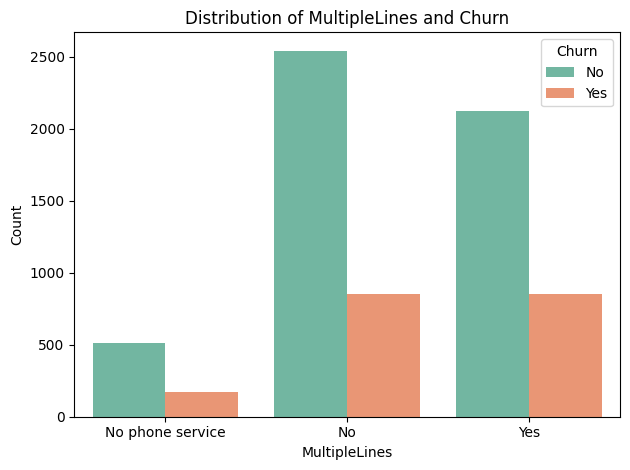

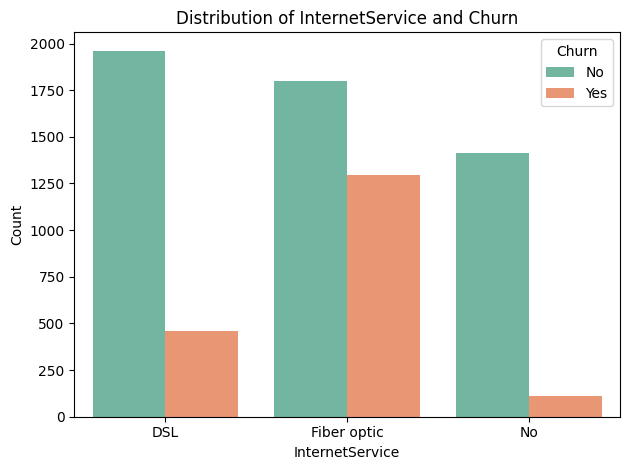

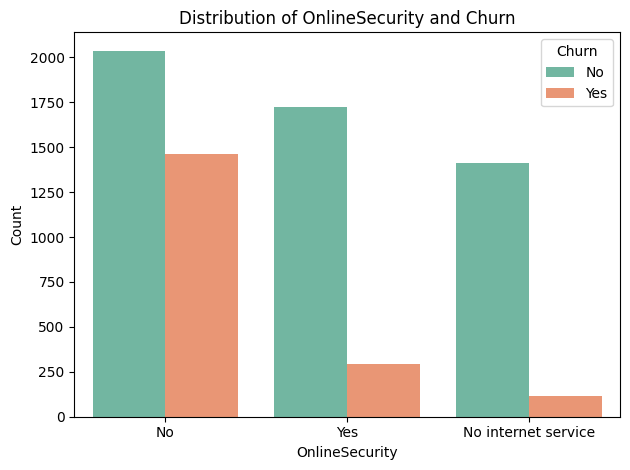

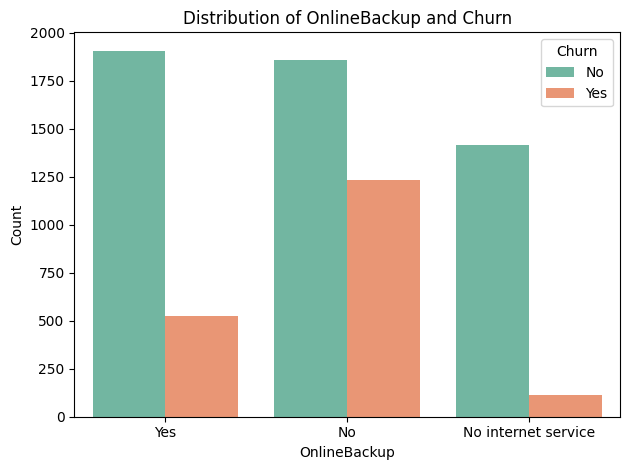

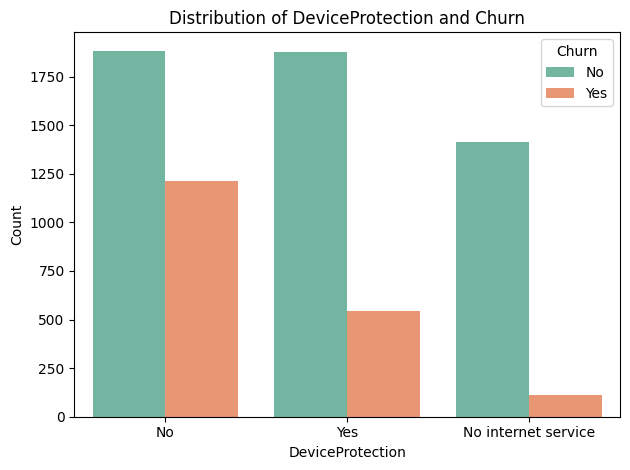

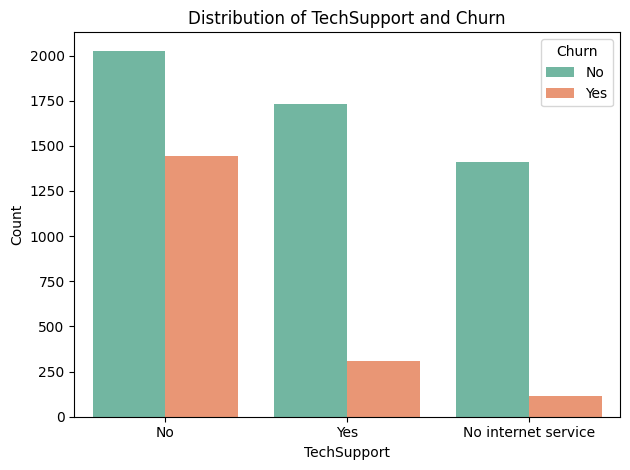

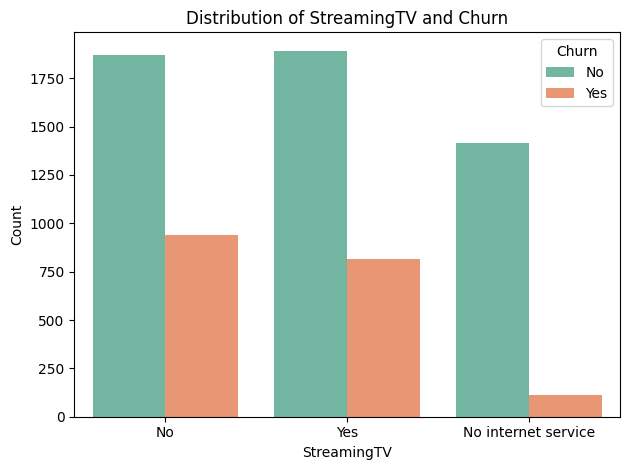

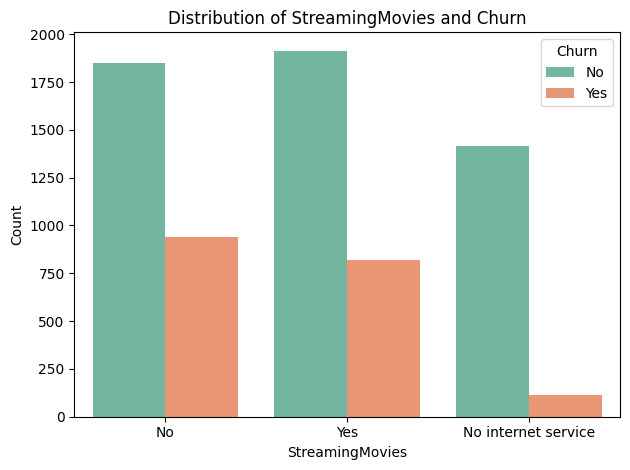

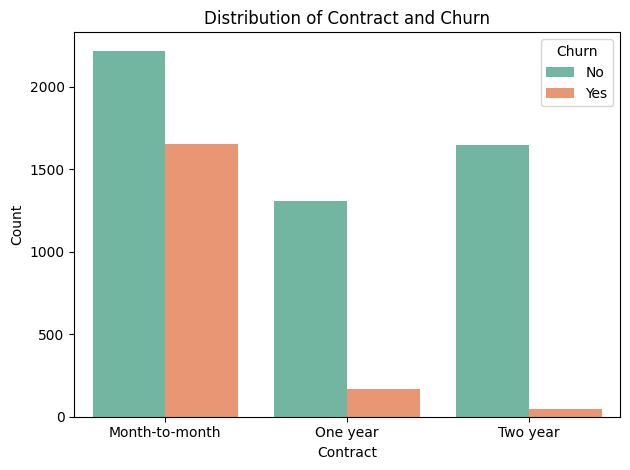

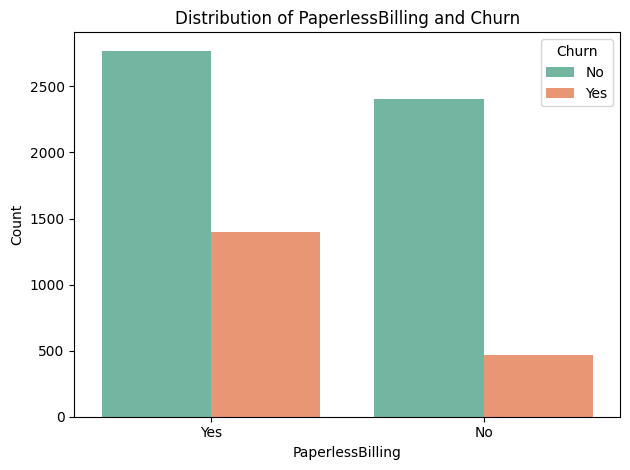

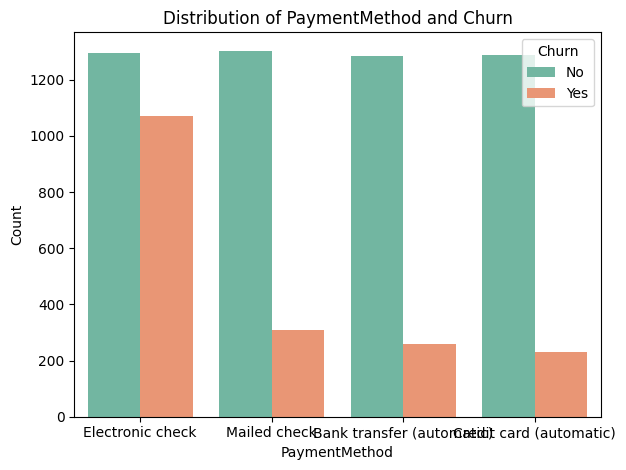

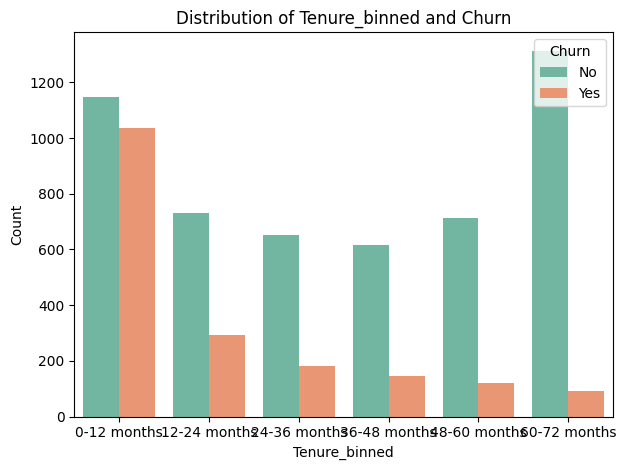

In [23]:
#plotting each categorical column, after dropping the numerical columns from the dataset
for i, predictor in enumerate(df.drop(columns=['Churn','tenure','TotalCharges','MonthlyCharges']).columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn', palette='Set2')
    plt.title(f'Distribution of {predictor} and Churn')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()

In [24]:
#converting the object data type into numerical data type by using dummy keys, so that a correlation plot can be made
# Keep the original 'Churn' column before encoding
encoded_df = pd.get_dummies(df.drop(columns=['Churn']))
# Add the original 'Churn' column back to the encoded dataframe
encoded_df['Churn'] = df['Churn']

<Axes: >

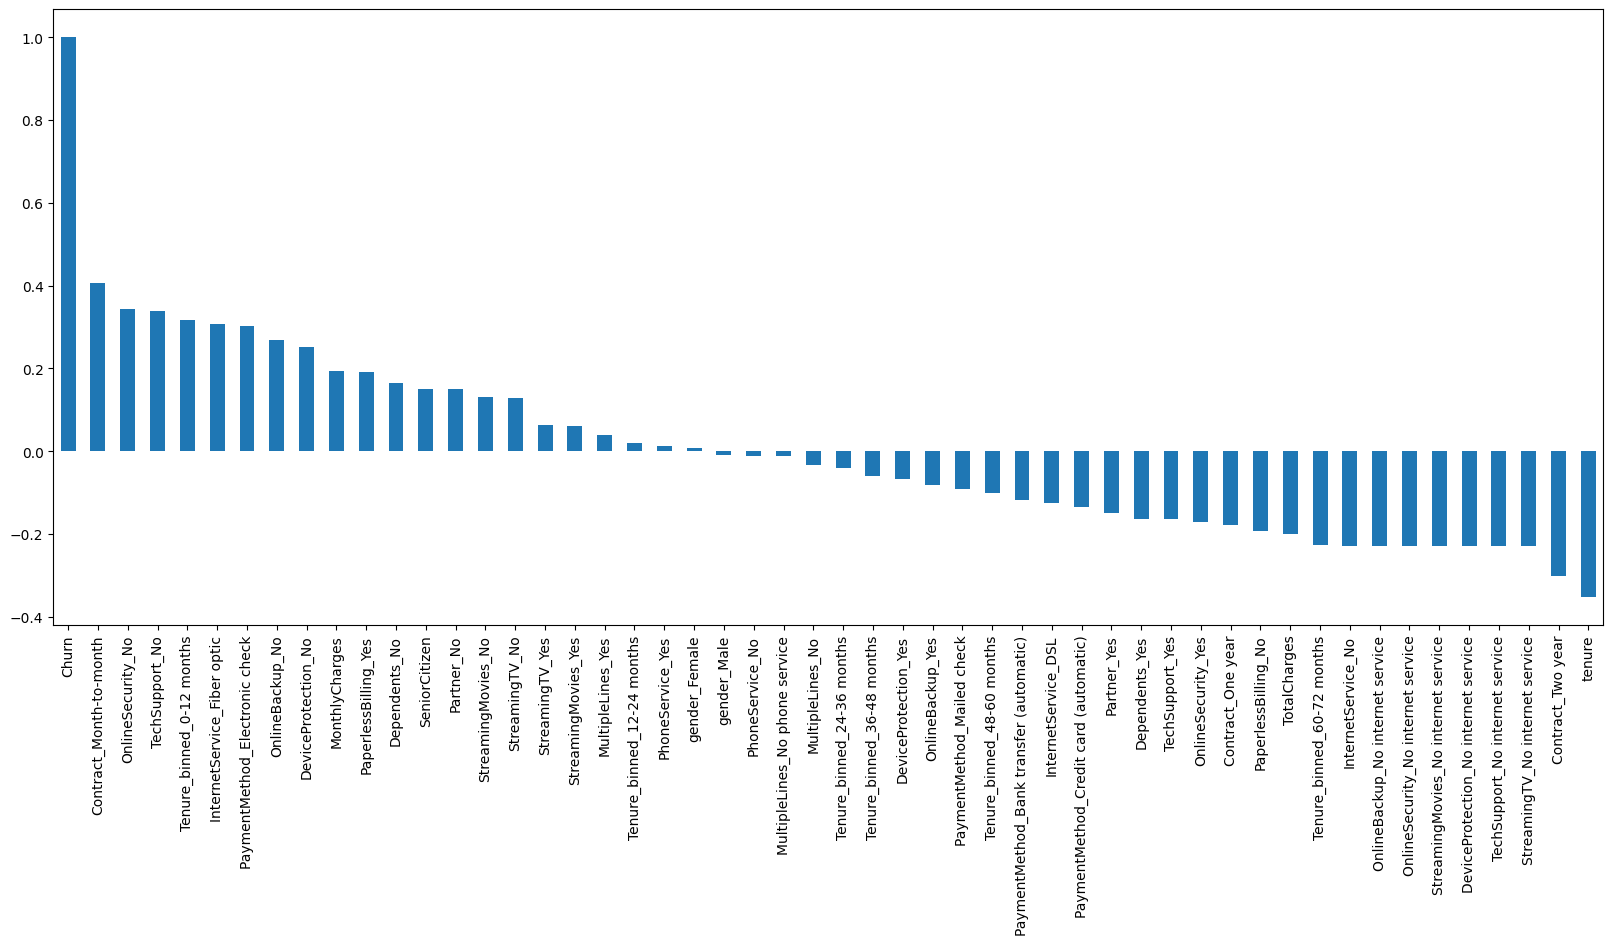

In [25]:
plt.figure(figsize=(20,8))
# Convert the 'Churn' column to numeric before plotting correlation
encoded_df['Churn'] = encoded_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
encoded_df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

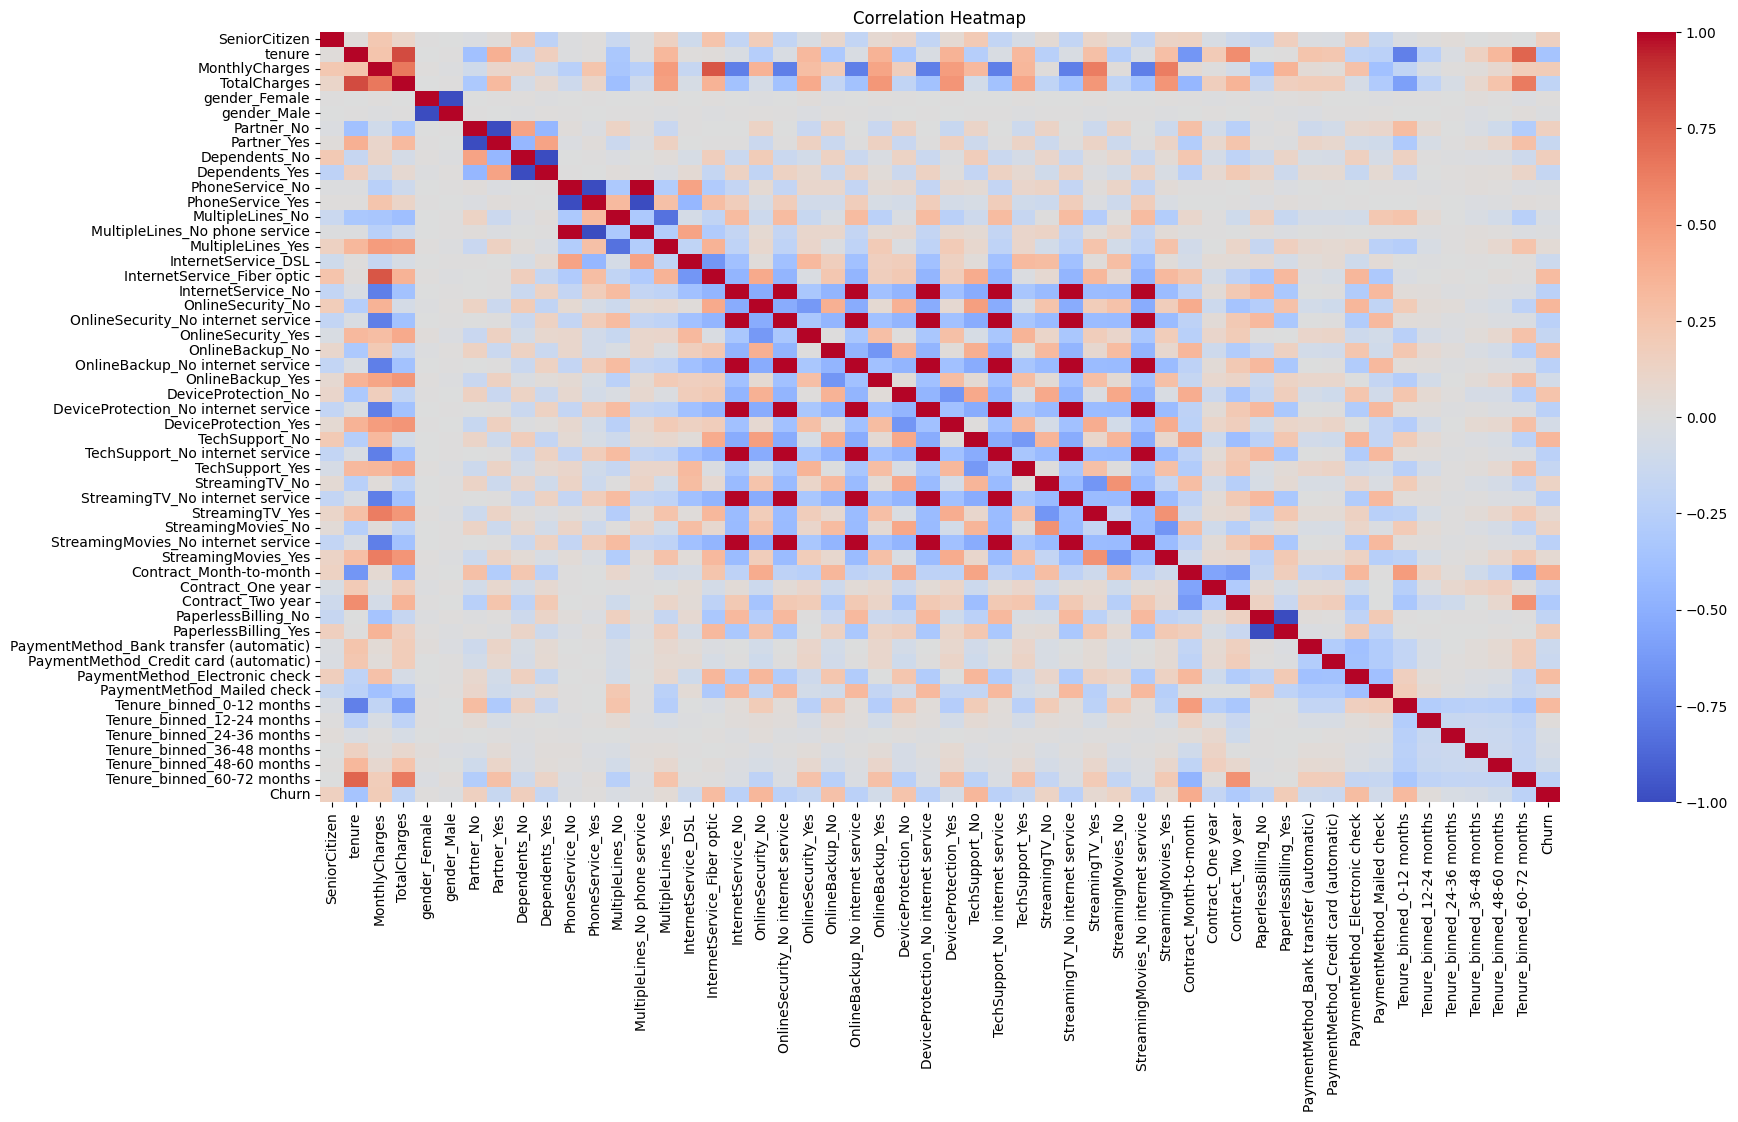

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(encoded_df.corr(), annot= False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [27]:
#splitting the dataset into churned and active data for overlap/split visualization
df_Churned = df[df['Churn'] == 'Yes']
df_Active = df[df['Churn'] == 'No']

In [28]:
#checking to confirm dataset was split into active and churn data
df_Churned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_binned
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 months
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-12 months
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,24-36 months
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,48-60 months


/tmp/ipython-input-2174842960.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_Active['tenure'], color="Red", shade = True)
/tmp/ipython-input-2174842960.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_Churned['tenure'], color="Blue", shade = True)


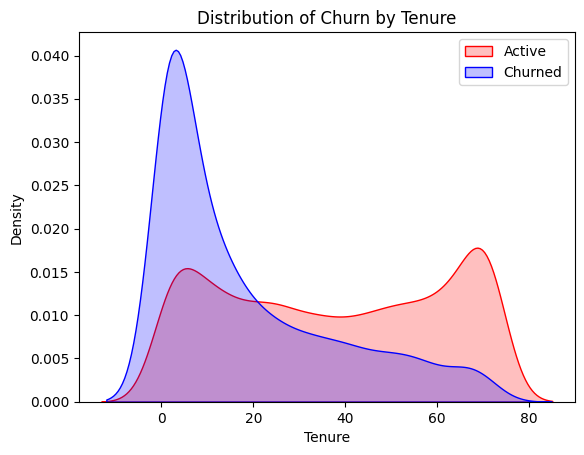

In [29]:
Tot = sns.kdeplot(df_Active['tenure'], color="Red", shade = True)
sns.kdeplot(df_Churned['tenure'], color="Blue", shade = True)
plt.legend(['Active', 'Churned'])
plt.title('Distribution of Churn by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()

/tmp/ipython-input-196358596.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_Active['TotalCharges'], color="Red", shade = True)
/tmp/ipython-input-196358596.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_Churned['TotalCharges'], color="Blue", shade = True)


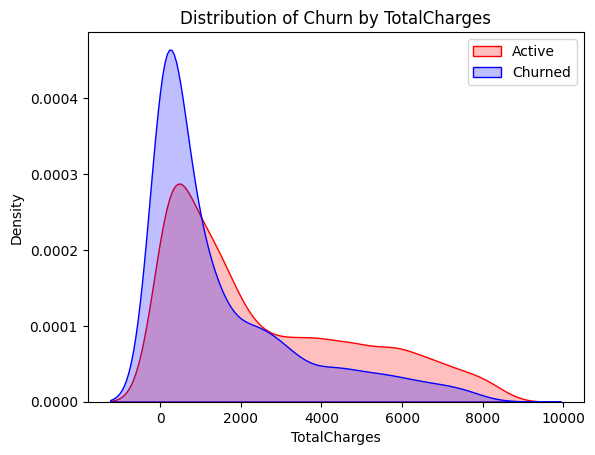

In [30]:
Tot = sns.kdeplot(df_Active['TotalCharges'], color="Red", shade = True)
sns.kdeplot(df_Churned['TotalCharges'], color="Blue", shade = True)
plt.legend(['Active', 'Churned'])
plt.title('Distribution of Churn by TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.show()

/tmp/ipython-input-1984658263.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_Active['MonthlyCharges'], color="Red", shade = True)
/tmp/ipython-input-1984658263.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_Churned['MonthlyCharges'], color="Blue", shade = True)


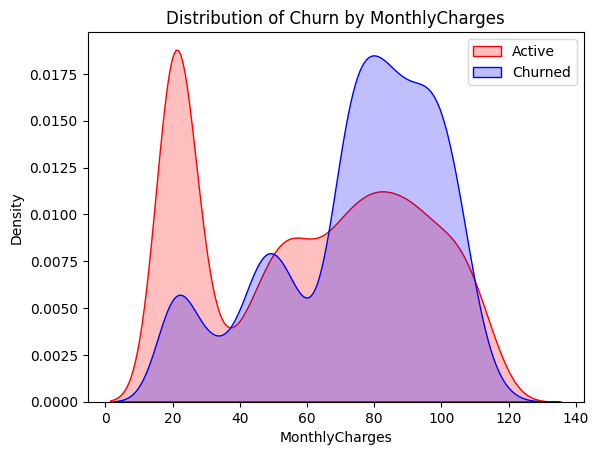

In [31]:
Tot = sns.kdeplot(df_Active['MonthlyCharges'], color="Red", shade = True)
sns.kdeplot(df_Churned['MonthlyCharges'], color="Blue", shade = True)
plt.legend(['Active', 'Churned'])
plt.title('Distribution of Churn by MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Density')
plt.show()

/tmp/ipython-input-703811387.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_Active['SeniorCitizen'], color="Red", shade = True)
/tmp/ipython-input-703811387.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_Churned['SeniorCitizen'], color="Blue", shade = True)


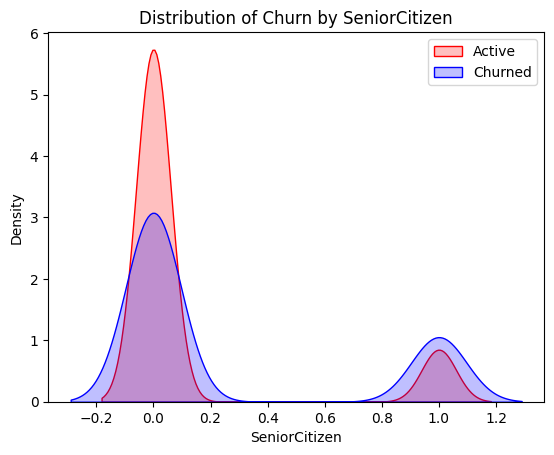

In [32]:
Tot = sns.kdeplot(df_Active['SeniorCitizen'], color="Red", shade = True)
sns.kdeplot(df_Churned['SeniorCitizen'], color="Blue", shade = True)
plt.legend(['Active', 'Churned'])
plt.title('Distribution of Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Density')
plt.show()

#Bivariate Analysis

In [33]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_binned
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12 months
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,24-36 months
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12 months
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,36-48 months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12 months


In [35]:
new_df_target_0 = df.loc[df['Churn'] == 0]
new_df_target_1 = df.loc[df['Churn'] == 1]

In [36]:
df.Churn.value_counts()

,count
Churn,
0,5174
1,1869


In [37]:
new_df_target_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_binned
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12 months
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12 months
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,0-12 months
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,24-36 months
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,48-60 months


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(df, x_col, hue_col, title):
    """Creates a count plot for the distribution of a specified column based on another categorical column."""
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.countplot(data=df, x=x_col, hue=hue_col, palette='Set2')  # Create count plot

    plt.title(title, fontsize=16)  # Set the title
    plt.xlabel(x_col.capitalize(), fontsize=14)  # Label for x-axis
    plt.ylabel('Count', fontsize=14)  # Label for y-axis
    plt.legend(title=hue_col.capitalize(), fontsize=12)  # Legend
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary

    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plot



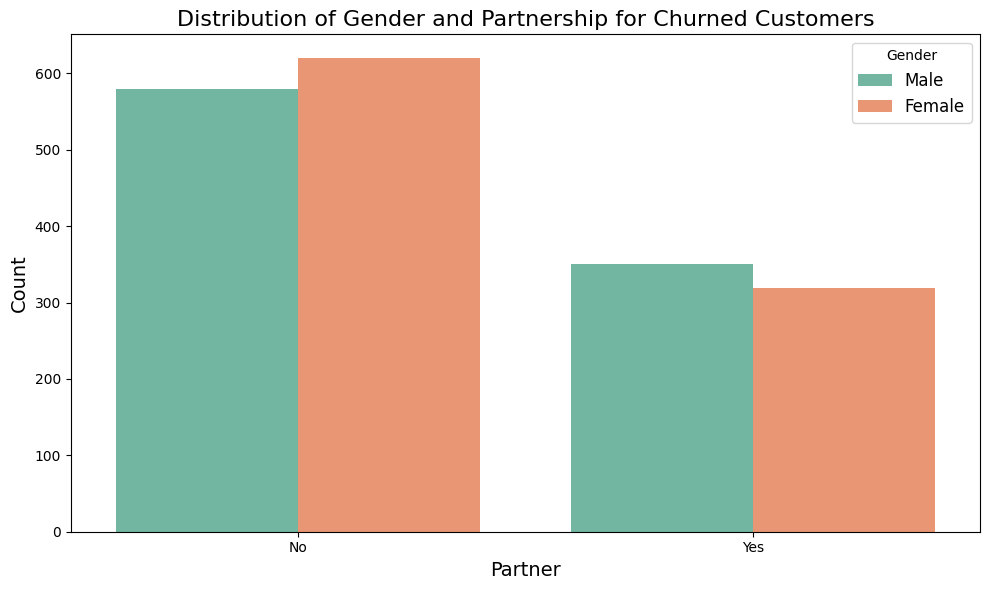

In [39]:
plot_distribution(new_df_target_1, 'Partner', 'gender', 'Distribution of Gender and Partnership for Churned Customers')

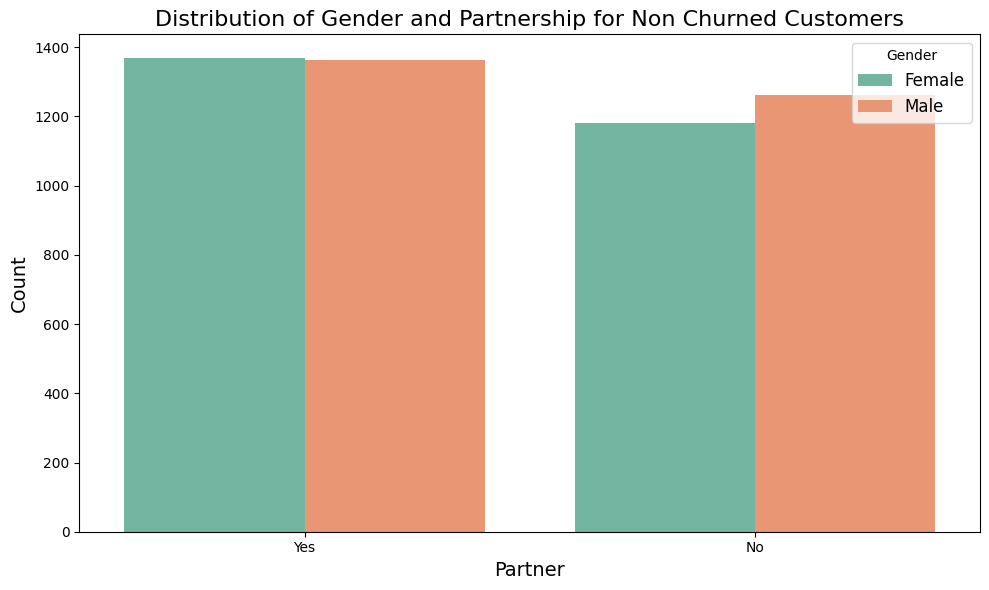

In [40]:
plot_distribution(new_df_target_0, 'Partner', 'gender', 'Distribution of Gender and Partnership for Non Churned Customers')

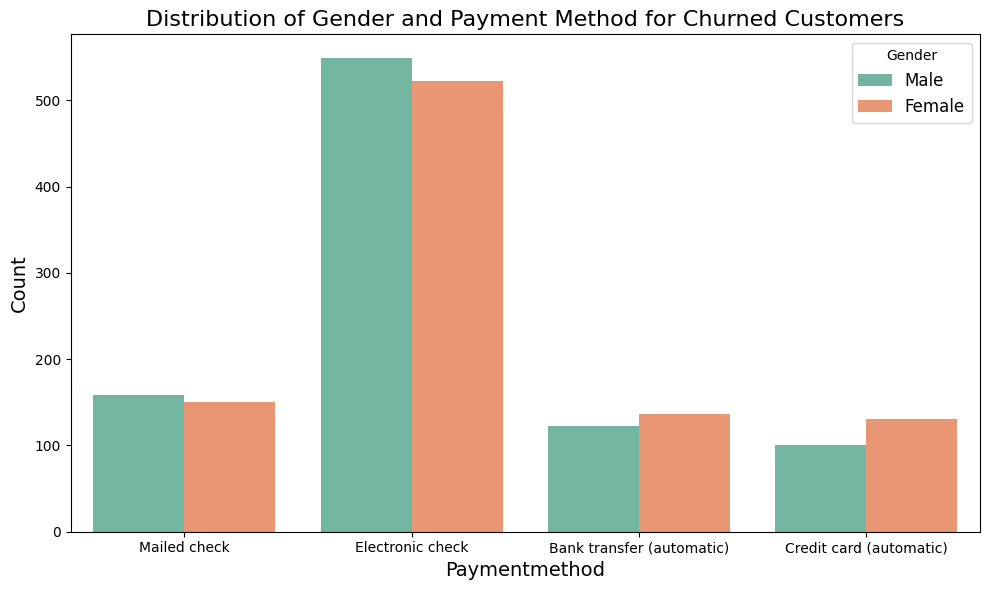

In [41]:
plot_distribution(new_df_target_1, 'PaymentMethod', 'gender', 'Distribution of Gender and Payment Method for Churned Customers')

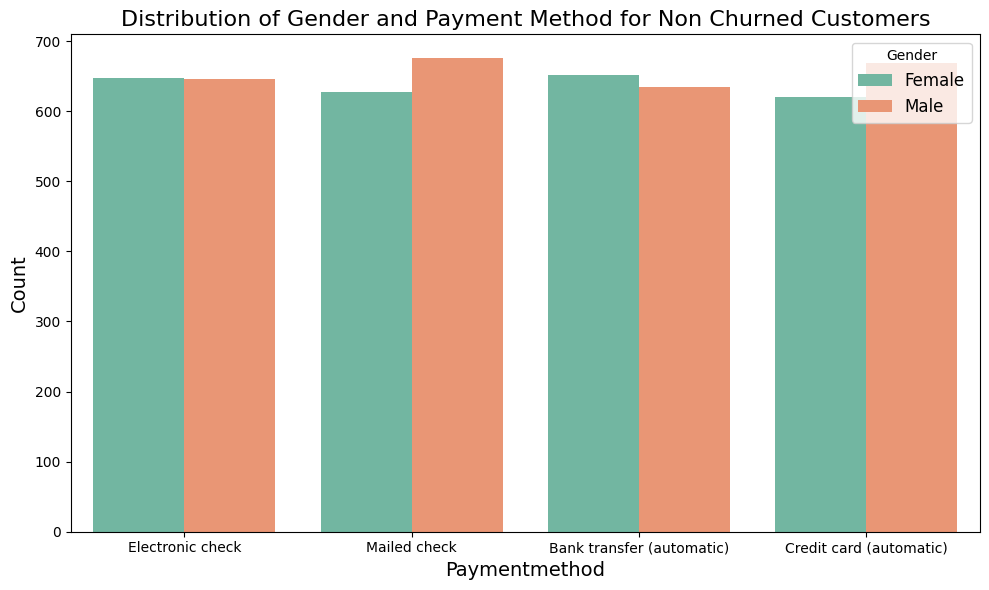

In [42]:
plot_distribution(new_df_target_0, 'PaymentMethod', 'gender', 'Distribution of Gender and Payment Method for Non Churned Customers')

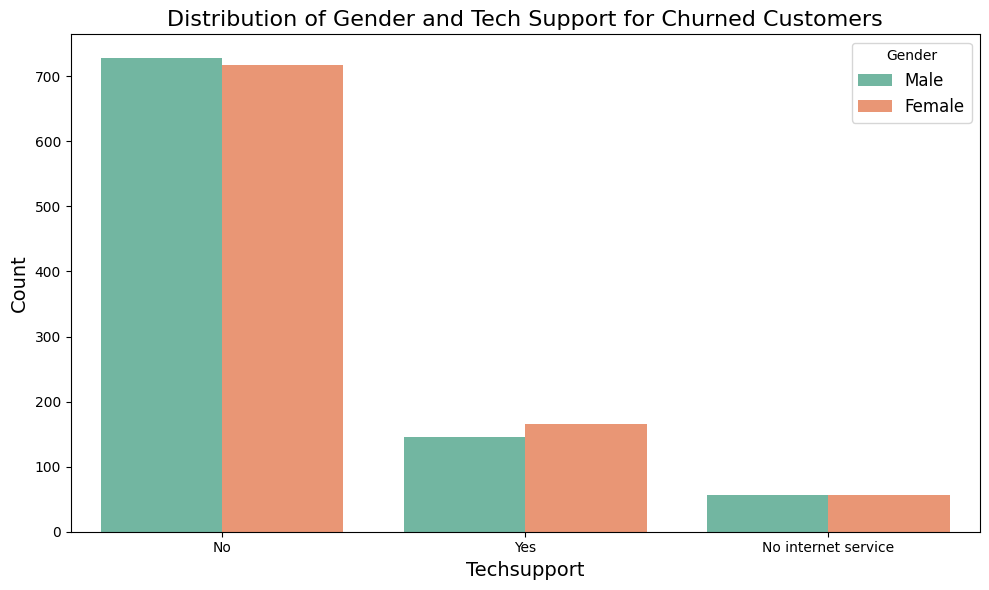

In [43]:
plot_distribution(new_df_target_1, 'TechSupport', 'gender', 'Distribution of Gender and Tech Support for Churned Customers')

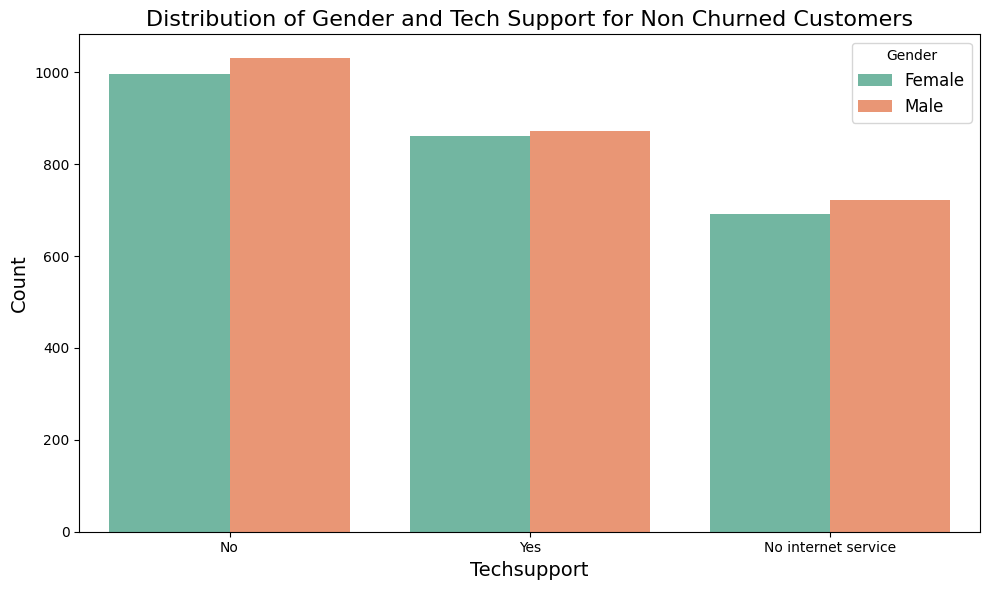

In [44]:
plot_distribution(new_df_target_0, 'TechSupport', 'gender', 'Distribution of Gender and Tech Support for Non Churned Customers')

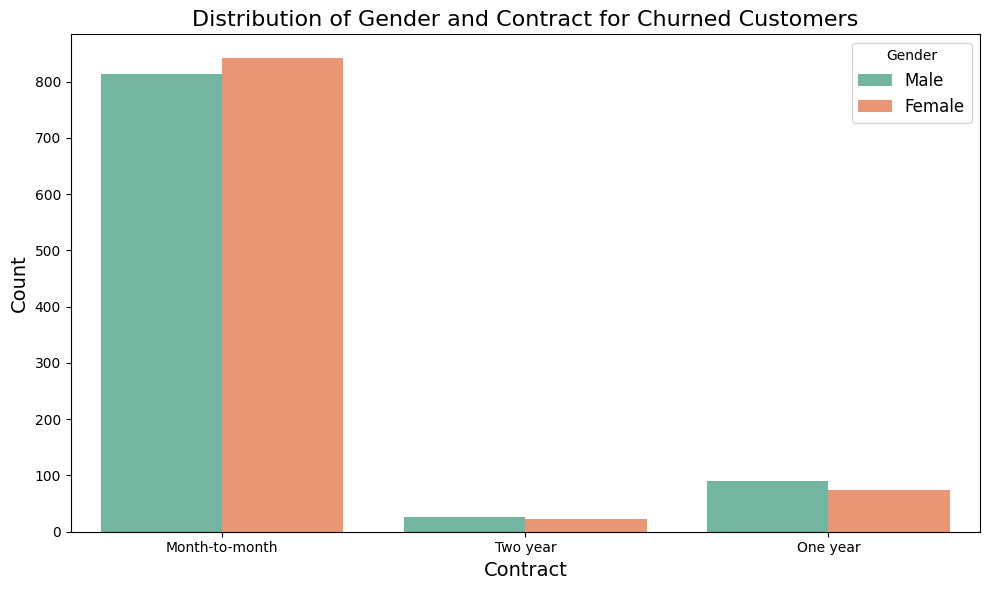

In [45]:
plot_distribution(new_df_target_1, 'Contract', 'gender', 'Distribution of Gender and Contract for Churned Customers')

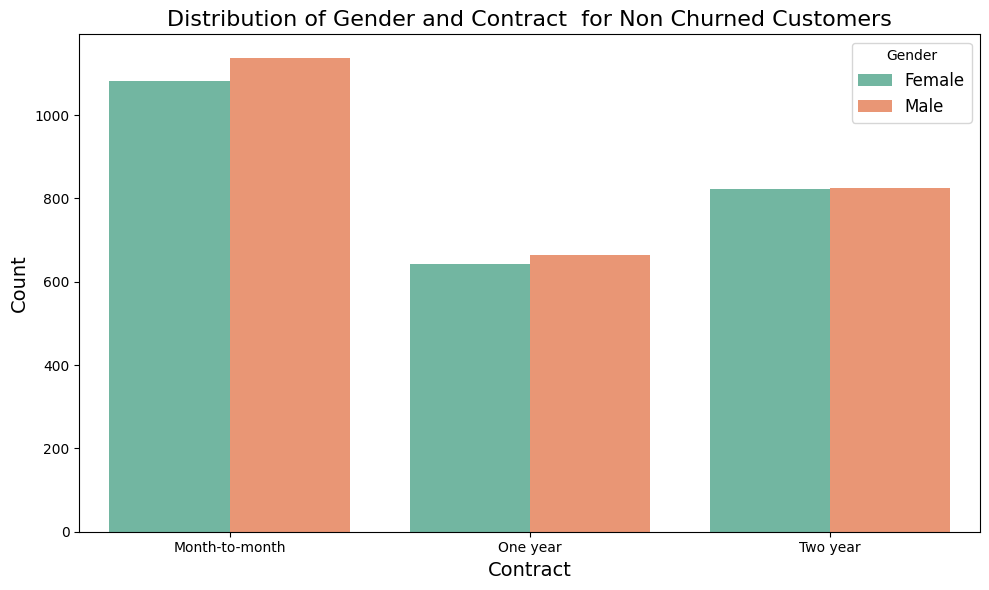

In [46]:
plot_distribution(new_df_target_0, 'Contract', 'gender', 'Distribution of Gender and Contract  for Non Churned Customers')

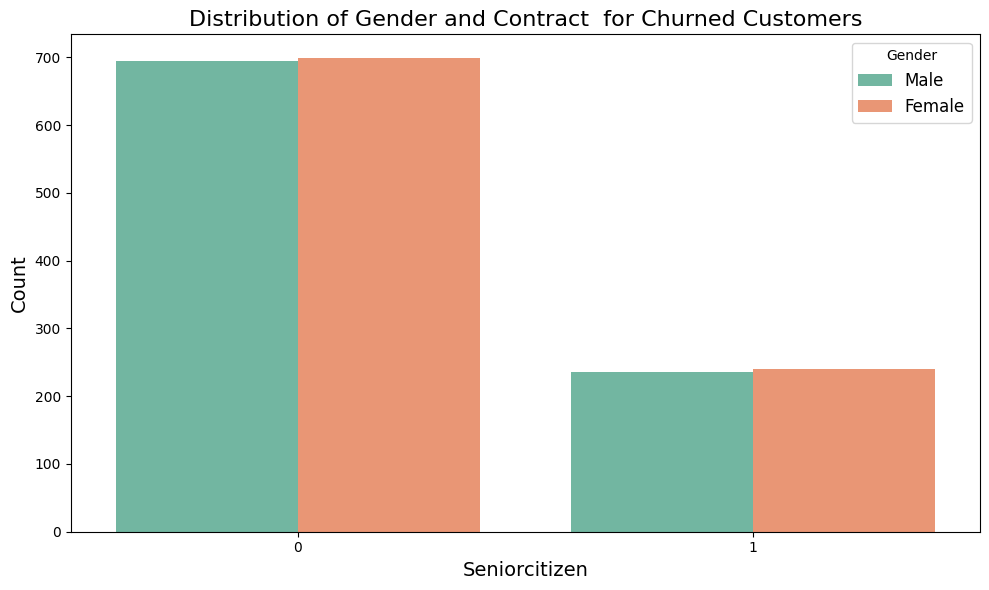

In [47]:
plot_distribution(new_df_target_1, 'SeniorCitizen', 'gender', 'Distribution of Gender and Contract  for Churned Customers')

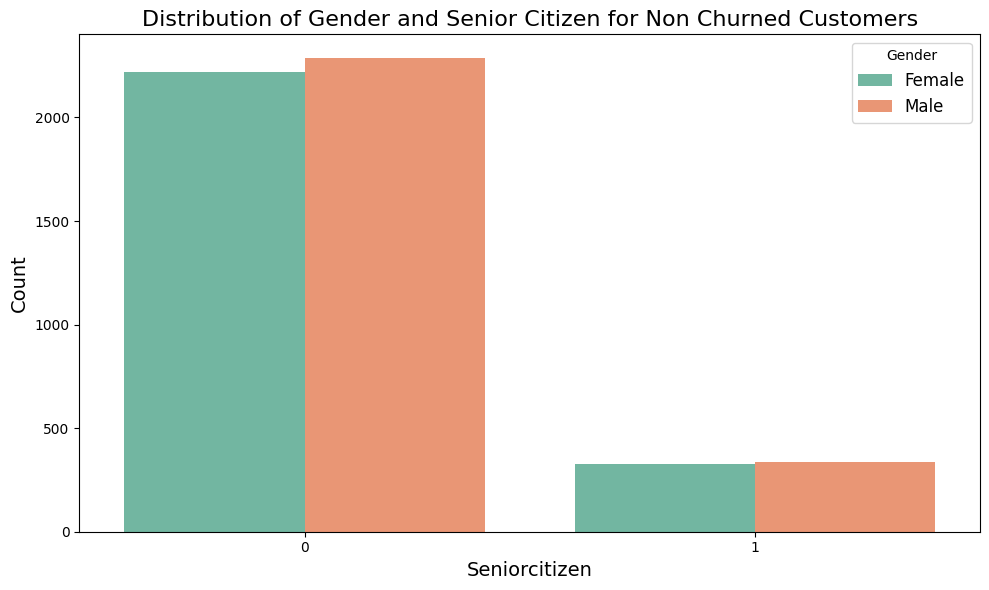

In [48]:
plot_distribution(new_df_target_0, 'SeniorCitizen', 'gender', 'Distribution of Gender and Senior Citizen for Non Churned Customers')

## Conclusions

-Senior citizens are more likely to churn

Customers that do not have a partner were more likely to churn as compared to customers with a partner.

-Partners without dependent were more likely to churn versus customers with dependents.

-Customers with a tenure that is lower were more likely to churn versus customers with a higher tenure.

-Customers with fibre optic internet service were more likely to churn as compared to DSL and no.

-Customers with no online security are more likely to churn as compared to customers with online security or internet service.

-Customers with no online backup were more likely to churn as compared to those that have it or no internet service.

-Customers with no device protection were more likely to churn than those that have device protection.

-Customers with no Tech Support were more likely to churn than those that have Tech Support. Streaming tv - Customers with no streaming tv were more likely to churn.

-Customers with a month to month contract were more likely to churn than customers with a one year or two year contract.

-Customers with lower total charges were more likely to churn than customers with a higher total charge.